# Druksensor ijken en maken van een $pV$-diagram

## Introductie

In de experimentele natuurkunde was het lang geleden gelukt om de krachten tussen ladingen te bestuderen zonder dat bekend was hoe groot die ladingen nu precies waren. Men laadde een metalen bol op en hield deze tegen een andere metalen bol van hetzelfde materiaal. Men redeneerde dat de ladingen op de bollen gelijk waren, omdat ze van hetzelfde materiaal waren. Vervolgens plaatste men de bollen in een vacuüm en mat men de krachten tussen de bollen met een zeer gevoelige balans. Op deze manier kon men de krachten tussen de ladingen bestuderen zonder de absolute waarde van de ladingen te kennen. Dit trucje kon herhaald worden met andere bollen waarna een kwantiatieve beschrijving van de krachten tussen ladingen mogelijk werd.

Een soortgelijke meettechniek gaan we gebruiken om een druksensor te ijken. Van de sensor zijn wel wat dingen bekend, maar omdat de spanning van de Arduino niet overeenkomstig is met de gewenste spanning, zouden we deze moeten ijken. We weten dat de sensor lineair is, dus als we twee punten weten, kunnen we de rest van de curve bepalen. Nog beter zou het zijn om drie punten te nemen en zo ook het lineaire karakter van de sensor te bevestigen.

## Theorie

Een injectiespuit met een maximaal volume van 50 mL is gevuld met lucht. De spuit kan aan een kant afgesloten worden met een tube die verbonden is met een druksensor die de gasdruk meet. Door de zuiger van de spuit in te drukken, wordt het volume verkleind en de druk verhoogd. Wanneer we de druk langzaam in drukken verwachten we dat de druk in de spuit volgens de wet van Boyle toeneemt:

$$
    P_1 V_1 = P_2 V_2 
$$ (eq:Boyle)

Omdat de gemeten spanning van de druksensor lineair afhankelijk is van de druk, kan de druk uitgedrukt worden als:

$$
    P = a U + b
$$ (eq:lineair)



## Methode en materialen

```{note} Software
De Arduino code staat al op de Arduino's. Als je de Arduino aansluit op je computer en de Arduino IDE opent, kan je de seriële monitor openen om de gemeten spanning te zien.
```

Je maakt gebruik van een Arduino. Daarvoor heb je de juiste IDE nodig. Het programma staat al op de Arduino's in het lokaal. Zodra je de Arduino aansluit op je computer zal de Arduino gaan meten, maar zijn de metingen nog niet zichtbaar. Je moet de Arduino op `Arduino MKR Zero` zetten. Dan wordt nog wel een driver geinstalleerd. 

Controleer of de Arduino herkend wordt door op `tools` -> `port` te klikken, daar staat de com poort van de Arduino. Open vervolgens de seriële monitor (het vergrootglas rechtsboven in de IDE) om de gemeten spanning te zien.

```{warning}
De twee stekkertjes hoef je NIET met elkaar te verbinden. Dit is alleen voor een meting in de brandblusser.
``` 

```{code} C++
int drukpin = A1;

void setup() {
  pinMode(A1,INPUT);
  Serial.begin(9600);
}

void loop() {
  Serial.println(analogRead(drukpin));
  delay(100);
}
```

### Deel 1
Stel de injectiespuit in op 40 mL en sluit de spuit aan op de druksensor door middel van een zo klein mogelijke tube. Meet de spanning van de druksensor met de Arduino en noteer deze waarde als $U_1$. Druk vervolgens de zuiger langzaam in tot 20 mL en meet opnieuw de spanning van de druksensor, noteer deze waarde als $U_2$. Herhaal dit voor volumes van 15 mL. ---> $U_3$

1. Leg uit waarom een zo klein mogelijke tube gebruikt moet worden.
2. Welke waarde hoort bij de gasdruk bij 40 mL? Zoek deze waarde op.
3. Welke waarden horen bij de gasdruk bij 20 en 15 mL? 
4. Gebruik de drie punten om de waarden van $a$ en $b$ in {numref}`vergelijking {number} <eq:lineair>` te bepalen en controleer of de sensor inderdaad lineair is door de waarden te plotten.

### Deel 2
Vervang daarbij de kleine tube voor een langere en bepaal het onbekende volume van de tube met een volgende meetserie waarbij je de druk en het volume bepaald. Zorg ervoor dat ook drukken onder de 1 atm gemeten worden. 
```{tip}
Maak gebruik van een systematische fout in het volume om het volume van de tube te vinden.
```

## Resultaten

In [9]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# deel 1
U_40 = 179
U_20 = 307
U_15 = 380

#vraag 1 
#Met een zo klein mogelijke tube komt er zo min mogelijk extra volume bij

#vraag 2 
P_40 = 126625

#vraag 3
P_20 = 253250
P_15 = 337667

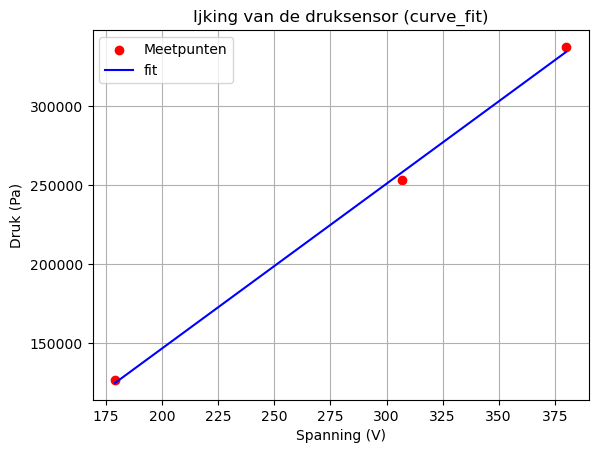

De waarde van a is: 1043.0801918046855 +/- 43.549474692241446
De waarde van b is: -61921.815367619136 +/- 13081.525790776375


In [19]:
#vraag 4
U = np.array([U_15, U_20, U_40])
P = np.array([P_15, P_20, P_40])

def fit_function(U, a, b):
    return a*U+b
#curve fit
popt, pcov = curve_fit(fit_function, U, P)
a, b = popt

#onzekerheden
sigma_a = np.sqrt(pcov[0,0])
sigma_b = np.sqrt(pcov[1,1])

U_fit = np.linspace(min(U), max(U), 200) 
P_fit = fit_function(U_fit, a, b)

#plot van Druk tegen spanning
plt.figure() 
plt.scatter(U, P, color='red', label="Meetpunten") 
plt.plot(U_fit, P_fit, color='blue', label="fit")
plt.xlabel("Spanning (V)")
plt.ylabel("Druk (Pa)")
plt.title("Ijking van de druksensor (curve_fit)")
plt.grid(True)
plt.legend()
plt.show()
print("De waarde van a is:", a, "+/-", sigma_a)
print("De waarde van b is:", b, "+/-", sigma_b)

In [22]:
# Deel 2:
# volume = np.array([60+a,50+a,40+a, 20+a, 10+a])
U2 = np.array([139,156,181, 295, 440])
druk2 = fit_function(U2, *popt)

A = (druk2[3]*20-druk2[4]*10)/(druk2[4]-druk2[3])
print("Het volume van de buis is =", A, "mL")



Het volume van de buis is = 6.250731984636242 mL


In [24]:
!git push

To https://github.com/Monjano/Monjano-Schebal-IP2.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/Monjano/Monjano-Schebal-IP2.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. If you want to integrate the remote changes,
hint: use 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
